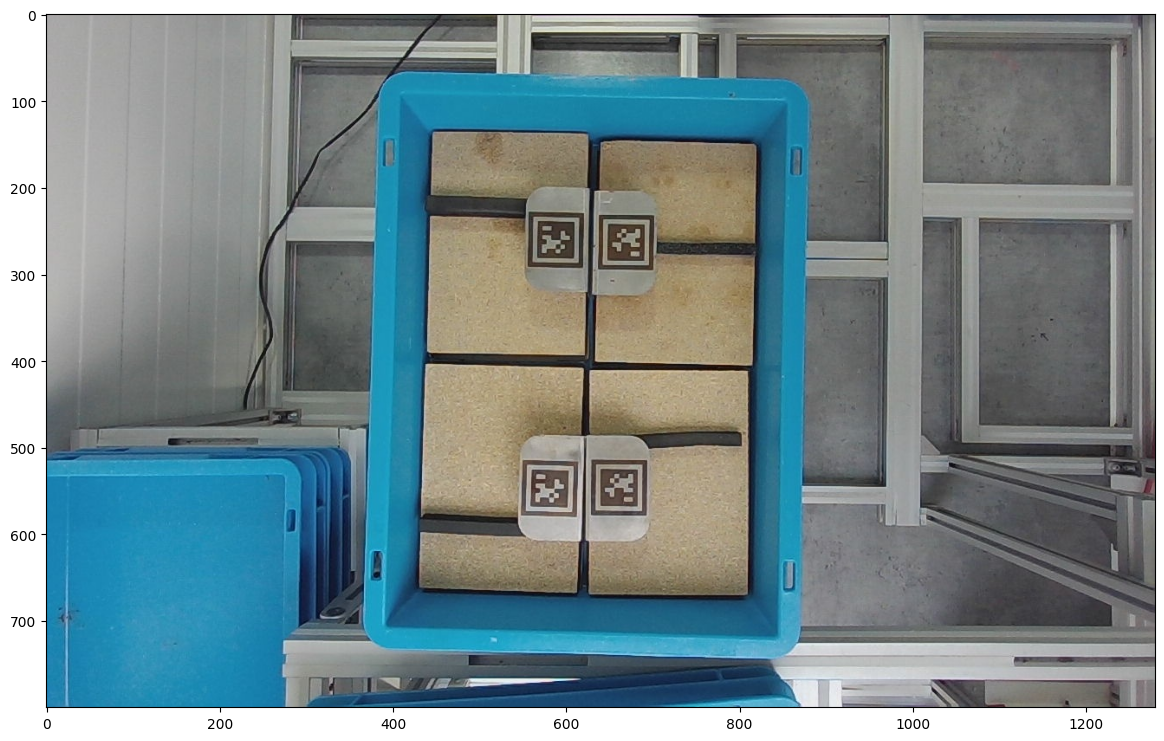

In [6]:
import avena_commons.vision.vision as vision

from matplotlib import pyplot as plt
#from lib_avena_vision.utils import VisionUtils
from copy import deepcopy
import cv2
import numpy as np
import json
import pickle
import os

dataset_path = "/home/avena/avena_commons/resources/box_test_images"
name = "20251113_114330_515"
sufix = "_qr_color_frame.jpg"

color_image = cv2.imread(os.path.join(dataset_path, f"{name}{sufix}"))

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))


2025-11-14 09:58:07.606994 [error] QR DETECTOR: Błąd podczas obliczania głębi: 'NoneType' object has no attribute 'shape'
Detections: [Detection object:
tag_family = b'tag36h11'
tag_id = 0
hamming = 0
decision_margin = 53.144500732421875
homography = [[ 5.23549533e+00  2.37544935e+01  5.88517010e+02]
 [-1.93588376e+01  1.53842674e+00  2.60304136e+02]
 [ 8.22577361e-03  3.92239097e-03  1.00000000e+00]]
center = [588.51701016 260.30413636]
corners = [[609.65960693 282.41674805]
 [610.09545898 239.573349  ]
 [567.55560303 238.38102722]
 [566.40783691 281.5447998 ]]
pose_R = [[ 0.01533347  0.9990227  -0.04145525]
 [-0.99971991  0.01606531  0.01737861]
 [ 0.01802762  0.04117716  0.99898921]]
pose_t = [[-0.03180277]
 [-0.0856797 ]
 [ 0.37117399]]
pose_err = 7.628446803702598e-08
, Detection object:
tag_family = b'tag36h11'
tag_id = 0
hamming = 0
decision_margin = 58.630218505859375
homography = [[-2.15667773e+00 -2.80945802e+01  6.69817236e+02]
 [ 2.06164789e+01 -2.88939128e+00  2.63412953e+

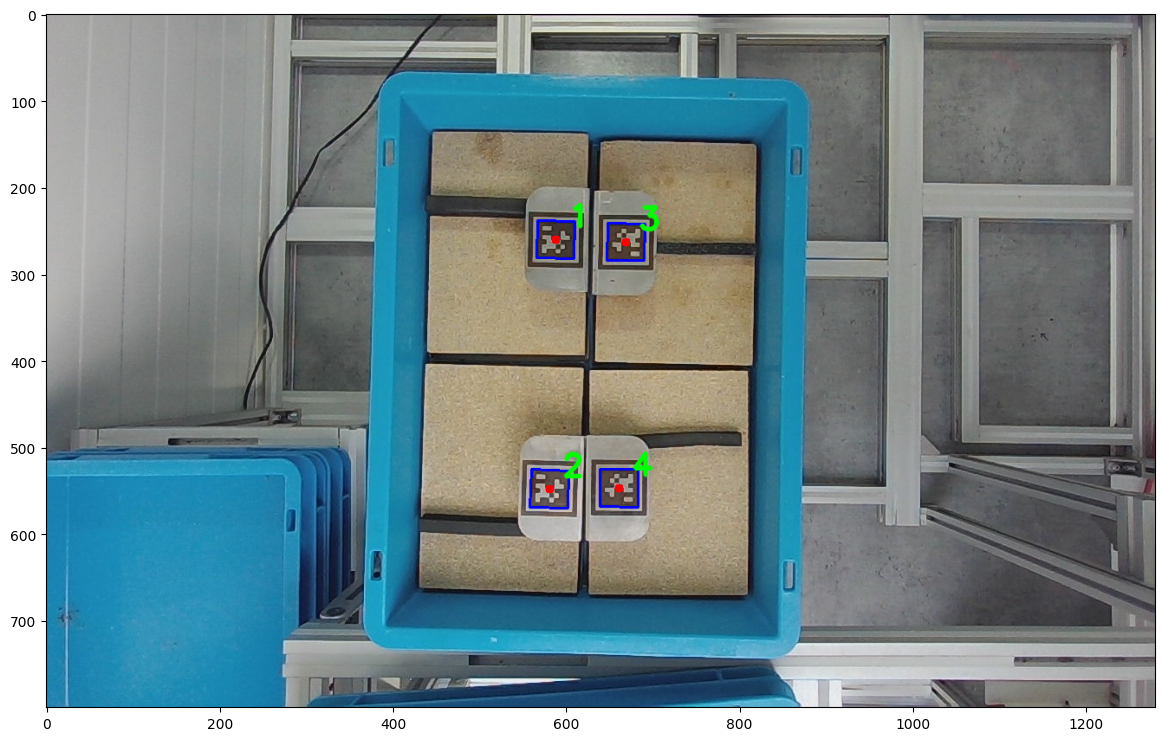

In [8]:
from avena_commons.vision.detector.qr_detector import qr_detector, create_qr_detection_visualization

config = {
    "clahe": {
        "clip_limit": 4.0,
        "grid_size": 8
    },
    "middle_area": {
        "max_x": 1.44,
        "min_x": 0.56
    },
    "mode": "gray",
    "qr_size": 0.026
}

frame = {
    "color": color_image,
    "depth": None
}

camera_config = {
    "camera_params": [
            613.788,
            613.756,
            641.051,
            402.142
        ],
    "distortion_coefficients": [
                -0.0318751,
                0.0338157,
                -0.000153122,
                -0.000599062,
                -0.0119746
            ],
}

detections, debug_data = qr_detector(frame = frame, config = config, camera_config = camera_config)

print("Detections:", detections)
print("Debug data keys:", debug_data.keys())

visualization = create_qr_detection_visualization(color_image = frame["color"], detections = detections, timestamp=0.0, debug_dir="/home/avena/avena_commons/tests/temp/debug_frames")

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.imshow(cv2.cvtColor(visualization, cv2.COLOR_BGR2RGB))

In [ ]:
from avena_commons.vision.vision import calculate_pose_pnp
from avena_commons.vision.camera import create_camera_matrix
from avena_commons.vision.validation.transfor_to_base import transform_to_base

for detection in detections:
    qr_result = calculate_pose_pnp(
                            corners=detection.corners,
                            a=config["qr_size"] * 1000,
                            b=config["qr_size"] * 1000,
                            z=detection.z,
                            camera_matrix=create_camera_matrix(
                                camera_config["camera_params"]
                            ),
                        )
    print("QR Pose:", qr_result)
    
    # qr_result = ( //Wygląda jakby tylko dla pozycji bez rotacji
    #     qr_result[0],  # x
    #     qr_result[1],  # y
    #     qr_result[2],  # z
    #     0.0,  # rx (zeroed)
    #     0.0,  # ry (zeroed)
    #     0.0,  # rz (zeroed)
    # )
    
    robot_position = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Example robot position (x, y, z, rx, ry, rz)
    camera_tool_offset = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Example camera tool offset (x, y, z, rx, ry, rz)
    
    
    position = transform_to_base(
        item = list(qr_result),
        current_tcp = robot_position,
        camera_tool_offset=self.__camera_config[
                                        "camera_tool_offset"
                                    ],
        is_rotation = False
    )
    

QR Pose: (-31.890581073920835, -85.88263853485068, 0.0, 0.0, 0.0, -88.91320541149751)
QR Pose: (17.30072206861323, -83.99705407299886, 0.0, 0.0, 0.0, 90.5623111850575)
QR Pose: (12.285006178371123, 87.34448832939675, 0.0, 0.0, 0.0, 90.12039251629803)
QR Pose: (-36.07365621978669, 88.0781113435555, 0.0, 0.0, 0.0, -87.917274731365)
